In [27]:
import numpy as np
import matplotlib.pyplot as plt

$x$ son los datos de entrada  
$t$ son las etiquetas 

In [51]:
x=np.vstack(([0,0],[0,1],[1,0],[1,1]))
t=np.array([0,1,1,0]).reshape(-1,1)

La red está constituida de dos capas: una capa de salida y una capa oculta. Cada capa está definida por una matriz de pesos $w_i$ para $i=1,2$

In [16]:
w1=np.random.rand(2,16)
w2=np.random.rand(16,1)

Para la "función de activación" $\sigma(x)$ se elige una sigmoide

$\sigma(x)=\frac{1}{1+e^{-x}}$  

In [18]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

Por lo que

$y_1=\sigma(w_1x+b_1)$ la primera capa recibe $x$ y saca $y_1$  
$y_s=\sigma(w_2y_1+b_2)$ la segunda capa recibe $y_1$ y saca $y_s$

En el caso simple donde $b_1,b_2$ son cero. Los valores $b_i$ son conocidos como "bias"

In [56]:
# y1=sigmoid(np.dot(x,w1))
# ys=sigmoid(np.dot(y1,w2))

La derivada de la función de activación sigmoidal es

$\frac{d\sigma}{dx}=\sigma(x)(1-\sigma(x))$

La función de costo $E(w_1,w_2)$ que la red minimiza está dada por

$E(w_1,w_2)=\sum_{i=1}^N(y_s-t)^2$ donde $y_s=\sigma(w_2\sigma(w_1x+b_1)+b_2)$  

In [21]:
# E=1/4*np.sum((ys-t)**2)

La solución de $\min_{w_1,w_2} E(w_1,w_2)$ se obtiene con las condiciones de optimalidad $\frac{dE}{dw_i}=0$ para $i=1,2$

En este caso $\frac{dE}{dw_2}$ está definida por la regla de la cadena
$\frac{dE}{dw_2}= \frac{dE}{dy_s}\frac{dy_s}{dw_2}$ 

donde $\frac{dE}{dy_s} = 2(y_s-t)$,  
  
$\frac{dy_s}{dw_2} = \sigma(w_2y_1+b_2)(1-\sigma(w_2y_1+b_1))y_1$ 

Por lo tanto $\frac{dE}{dw_2} = 2(y_s-t)y_s(1-y_s)y_1$

Para $\frac{dE}{dw_1}$ por regla de la cadena tenemos que 
$\frac{dE}{dw_1}= \frac{dE}{dy_s}\frac{dy_s}{dy_1} \frac{dy_1}{dw_1}$ 

$\frac{dE}{dy_s} = 2(y_s-t)$ ya la tenemos,

$\frac{dy_s}{dy_1} = \sigma(w_2y_1+b_2)(1-\sigma(w_2y_1+b_2))w_2$, 

$\frac{dy_1}{dw_1} = \sigma(w_1x+b_1)(1-\sigma(w_1x+b_1))x$ por lo que

$\frac{dE}{dw_1} = 2(y_s-t)y_s(1-y_s)w_2y_1(1-y_1)$

In [20]:
# dEdw2=2*(np.dot(y1.T,(ys-t)*ys*(1-ys)))
# dEdw1=2*np.dot(x.T,np.dot((ys-t)*ys*(1-ys),w2.T)*y1*(1-y1))

Ya que se tiene el gradiente de $E$, i.e. $\nabla E = (\frac{dE}{dw_1}, \frac{dE}{dw_2})$, podemos usar el método de descenso de gradiente para encontrar el mínimo. 

Esto es, construimos una sucesión de valores $w^k$ para $k=1,2,3, \ldots$ usando la regla  

$w^{k+1}=w^k-\alpha \nabla E(w^k)$ donde $w=(w_1,w_2)$

Visto de otra forma  

$w_1^{k+1}=w_1^{k} - \alpha \frac{dE(w^k)}{dw_1}$  
$w_2^{k+1}=w_2^{k} - \alpha \frac{dE(w^k)}{dw_2}$  

para $k=1,2,3, \ldots$ 

En optimización, $\alpha$ es conocido como el "paso" en la dirección de búsqueda pero en el contexto de redes neuronales se le conoce como el "learning rate" o tasa de aprendizaje.  
Por otro lado, al método para construir el gradiente usando la regla de la cadena se conoce como "backpropagation".  
Cada iteración $k$ es conocida como épocas

### El algoritmo implementado en Python para la función XOR es

In [30]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

x=np.vstack(([0,0],[0,1],[1,0],[1,1]))
t=np.array([0,1,1,0]).reshape(-1,1)

w1=np.random.rand(2,16)
w2=np.random.rand(16,1)

alpha=1

loss=[]
for i in range(1000):
    y1=sigmoid(np.dot(x,w1))
    ys=sigmoid(np.dot(y1,w2))
    E=1/4*np.sum((ys-t)**2)
    dEdw2=2*(np.dot(y1.T,(ys-t)*ys*(1-ys)))
    dEdw1=2*np.dot(x.T,np.dot((ys-t)*ys*(1-ys),w2.T)*y1*(1-y1))
    w2=w2-alpha*dEdw2
    w1=w1-alpha*dEdw1
    loss.append(E)

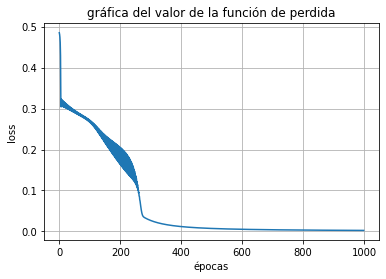

In [34]:
plt.plot(loss)
plt.title('gráfica del valor de la función de perdida')
plt.xlabel('épocas')
plt.ylabel('loss')
plt.grid()

La función de predicción es entonces

In [73]:
 def pred(x,w1,w2):
    y1=sigmoid(np.dot(x,w1))
    ys=sigmoid(np.dot(y1,w2))
    if ys>=0.5:
        return 1
    else:
        return 0

Ejemplo, definimos los 4 valores posbles de la función XOR

In [83]:
x0=np.array([0,0])
x1=np.array([0,1])
x2=np.array([1,0])
x3=np.array([1,1])

y "predecimos" su valor

In [85]:
print('y = %i' % pred(x0,w1,w2))
print('y = %i' % pred(x1,w1,w2))
print('y = %i' % pred(x2,w1,w2))
print('y = %i' % pred(x3,w1,w2))

y = 0
y = 1
y = 1
y = 0
